# Snakes and Ladders HW
## Jack Farmer, 1 Dec 2023

In [10]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]
np.random.seed(42)

modal number of moves: 29


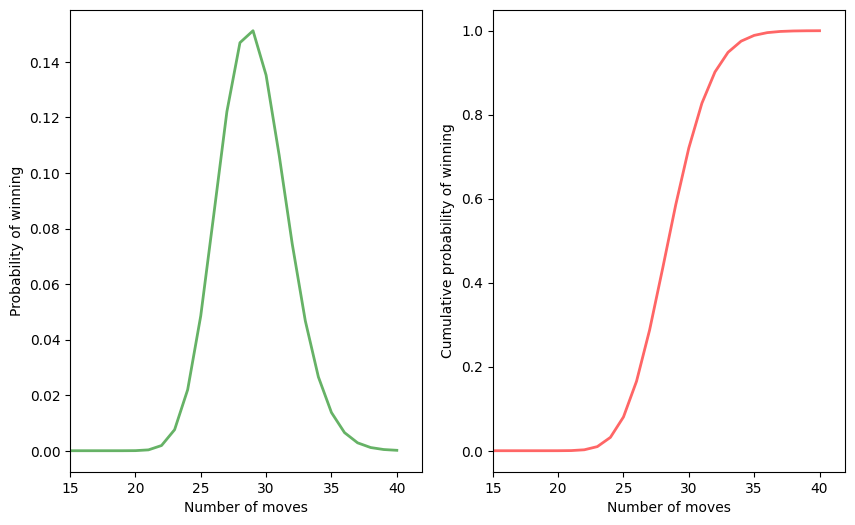

In [11]:
# Set up the transition matrix
T = np.zeros((101, 101))
for i in range(1,101):
    T[i-1,i:i+6] = 1/6
    
# required to land on 100
requirement_prob = 0.9999

# House rules: you  need to land on 100.
T[95, 100] = 2/6
T[96, 100] = 3/6
T[97, 100] = 4/6
T[98, 100] = 5/6
T[99, 100] = 1

#print(T[0:6,0:12])
#print(T[94:100,94:101])

# The player starts at position 0.
v = np.zeros(101)
v[0] = 1

n, P, C = 0, [], []
cumulative_prob = 0
# Update the state vector v until the cumulative probability of winning
# is "effectively" 1
while cumulative_prob < requirement_prob:
    n += 1
    v = v.dot(T)
    P.append(v[100])
    cumulative_prob += P[-1]
    C.append(cumulative_prob)
    
mode = np.argmax(P)+1
print('modal number of moves:', mode)

# Plot the probability of winning as a function of the number of moves
fig, ax = plt.subplots(1,2)
ax[0].plot(np.linspace(1,n,n), P, 'g', lw=2, alpha=0.6)
ax[0].set_xlim(15)
ax[0].set_xlabel('Number of moves')
ax[0].set_ylabel('Probability of winning')
ax[1].plot(np.linspace(1,n,n), C, 'r', lw=2, alpha=0.6)
ax[1].set_xlim(15)
ax[1].set_xlabel('Number of moves')
ax[1].set_ylabel('Cumulative probability of winning')

plt.show()

modal number of moves: 23


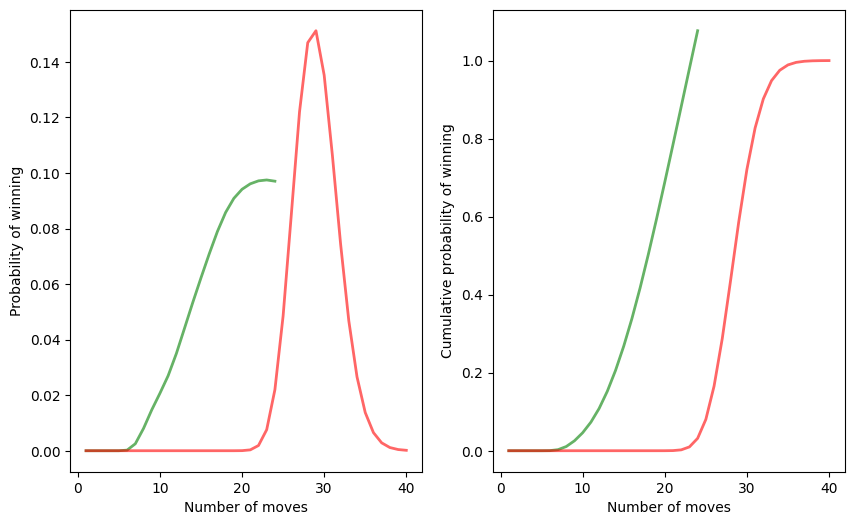

In [12]:
ladders = [(3,19), (15,37), (22,42), (25,64), (41,73),
           (53,74), (63,86), (76,91), (84,98)]
snakes = [(11,7), (18,13), (28,12), (36,34), (77,16),
          (47,26), (83,39), (92,75), (99,70)]
trans = ladders + snakes

# Set up the transition matrix
T = np.zeros((101, 101))

for i in range(1,101):
    T[i-1,i:i+6] = 1/6
    
# House rules: you don't need to land on 100.
T[95, 100] = 2/6
T[96, 100] = 3/6
T[97, 100] = 4/6
T[98, 100] = 5/6
T[99, 100] = 1

for (i1,i2) in trans:
    iw = np.where(T[:,i1] > 0)
    T[:,i1] = 0
    T[iw,i2] += 1/6

# House rules: you need to land on 100, just reach it.
T[95,95] = 1/6
T[96,96] = 2/6
T[97,97] = 3/6
T[98,98] = 4/6
T[99,99] = 5/6

for snake in snakes:
    T[snake,100] = 0

# The player starts at position 0.
v = np.zeros(101)
v[0] = 1

ns, Ps, Cs = 0, [], []
cumulative_prob = 0
# Update the state vector v until the cumulative probability of winning
# is "effectively" 1
while cumulative_prob < requirement_prob:
    ns += 1
    v = v.dot(T)
    Ps.append(v[100])
    cumulative_prob += Ps[-1]
    Cs.append(cumulative_prob)
    
mode = np.argmax(Ps)+1
print('modal number of moves:', mode)

# Plot the probability of winning as a function of the number of moves
fig, ax = plt.subplots(1,2)
ax[0].plot(np.linspace(1,ns,ns), Ps, 'g-', lw=2, alpha=0.6, label='Markov')
ax[0].plot(np.linspace(1,n,n), P, 'r-', lw=2, alpha=0.6, label='No snakes or ladders')
ax[0].set_xlabel('Number of moves')
ax[0].set_ylabel('Probability of winning')
ax[1].plot(np.linspace(1,ns,ns), Cs, 'g-', lw=2, alpha=0.6, label='Markov')
ax[1].plot(np.linspace(1,n,n), C, 'r-', lw=2, alpha=0.6, label='No snakes or ladders')
ax[1].set_xlabel('Number of moves')
ax[1].set_ylabel('Cumulative probability of winning')

plt.show()

In [13]:
total_rolls_with = []

for game in range(0, 100):
    # spot on board
    spot = 0 # 0 - 100
    # number of rolls
    rolls = 0
    
    # 100 = win
    while spot < 100:
        rolls += 1 # increment each roll
        die_roll = np.random.uniform(1, 7)
        spot += die_roll
        if spot > 100:
            spot -= die_roll
        
        for ladder in ladders:
            if ladder[0] == spot:
                spot = ladder[1]
                break
                
        for snake in snakes:
            if snake[0] == spot:
                spot = snake[1]
                break
    total_rolls_with.append(rolls)
    
fig, ax = plt.subplots(1,2)
ax[0].plot(np.linspace(1,np.max(total_rolls_with),np.max(total_rolls_with)), np.bincount(total_rolls_with) / 100, 'g-', lw=2, alpha=0.6, label='Markov')
ax[0].plot(np.linspace(1,n,n), P, 'r-', lw=2, alpha=0.6, label='No snakes or ladders')
ax[0].set_xlabel('Number of moves')
ax[0].set_ylabel('Probability of winning')
ax[1].plot(np.linspace(1,ns,ns), Cs, 'g-', lw=2, alpha=0.6, label='Markov')
ax[1].plot(np.linspace(1,n,n), C, 'r-', lw=2, alpha=0.6, label='No snakes or ladders')
ax[1].set_xlabel('Number of moves')
ax[1].set_ylabel('Cumulative probability of winning')

                
        

KeyboardInterrupt: 

In [ ]:
total_rolls_without = []

for game in range(0, 100):
    # spot on board
    spot = 0 # 0 - 100
    # number of rolls
    rolls = 0
    
    # 100 = win
    while spot < 100:
        rolls += 1 # increment each roll
        die_roll = np.random.uniform(1, 7)
        spot += die_roll
        if spot > 100:
            spot -= die_roll

    total_rolls_without.append(rolls)
    
fig, ax = plt.subplots(1,2)
ax[0].plot(np.linspace(1,np.max(total_rolls_without),np.max(total_rolls_without)), np.bincount(total_rolls_without) / 100, 'g-', lw=2, alpha=0.6, label='Markov')
ax[0].plot(np.linspace(1,n,n), P, 'r-', lw=2, alpha=0.6, label='No snakes or ladders')
ax[0].set_xlabel('Number of moves')
ax[0].set_ylabel('Probability of winning')
ax[1].plot(np.linspace(1,ns,ns), Cs, 'g-', lw=2, alpha=0.6, label='Markov')
ax[1].plot(np.linspace(1,n,n), C, 'r-', lw=2, alpha=0.6, label='No snakes or ladders')
ax[1].set_xlabel('Number of moves')
ax[1].set_ylabel('Cumulative probability of winning')

In [ ]:
total_rolls_win_with = []

for game in range(0, 100):
    # spot on board, p1
    spot1 = 0 # 0 - 100
    # number of rolls, p1
    rolls1 = 0
    # spot on board, p2
    spot2 = 0 # 0 - 100
    # number of rolls, p2
    rolls2 = 0
    while spot1 < 100 and spot2 < 100:
        
        # P1 Turn
        
        rolls1 += 1
        die_roll = np.random.uniform(1, 7)
        spot1 += die_roll
        if spot1 > 100:
            spot1 -= die_roll
        elif spot1 == 100:
            total_rolls_win_with.append(rolls1)
        
        for ladder in ladders:
            if ladder[0] == spot1:
                spot1 = ladder[1]
                break
        for snake in snakes:
            if snake[0] == spot1:
                spot1 = snake[1]
                break
                
        # P2 Turn
        
        rolls2 += 1
        die_roll = np.random.uniform(1, 7)
        spot2 += die_roll
        if spot2 > 100:
            spot2 -= die_roll
        elif spot2 == 100:
            total_rolls_win_with.append(rolls2)
        
        for ladder in ladders:
            if ladder[0] == spot2:
                spot2 = ladder[1]
                break
        for snake in snakes:
            if snake[0] == spot2:
                spot2 = snake[1]
                break
                
    fig, ax = plt.subplots(1,2)
ax[0].plot(np.linspace(1,np.max(total_rolls_win_with),np.max(total_rolls_win_with)), np.bincount(total_rolls_win_with) / 100, 'g-', lw=2, alpha=0.6, label='Markov')
ax[0].plot(np.linspace(1,n,n), P, 'r-', lw=2, alpha=0.6, label='No snakes or ladders')
ax[0].set_xlabel('Number of moves')
ax[0].set_ylabel('Probability of winning')
ax[1].plot(np.linspace(1,ns,ns), Cs, 'g-', lw=2, alpha=0.6, label='Markov')
ax[1].plot(np.linspace(1,n,n), C, 'r-', lw=2, alpha=0.6, label='No snakes or ladders')
ax[1].set_xlabel('Number of moves')
ax[1].set_ylabel('Cumulative probability of winning')    
        

In [ ]:
total_rolls_win_without = []

for game in range(0, 100):
    # spot on board, p1
    spot1 = 0 # 0 - 100
    # number of rolls, p1
    rolls1 = 0
    # spot on board, p2
    spot2 = 0 # 0 - 100
    # number of rolls, p2
    rolls2 = 0
    while spot1 < 100 and spot2 < 100:
        
        # P1 Turn
        
        rolls1 += 1
        die_roll = np.random.uniform(1, 7)
        spot1 += die_roll
        if spot1 > 100:
            spot1 -= die_roll
        elif spot1 == 100:
            total_rolls_win_without.append(rolls1)

                
        # P2 Turn
        
        rolls2 += 1
        die_roll = np.random.uniform(1, 7)
        spot2 += die_roll
        if spot2 > 100:
            spot2 -= die_roll
        elif spot2 == 100:
            total_rolls_win_without.append(rolls2)

    fig, ax = plt.subplots(1,2)
ax[0].plot(np.linspace(1,np.max(total_rolls_win_without),np.max(total_rolls_win_without)), np.bincount(total_rolls_win_without) / 100, 'g-', lw=2, alpha=0.6, label='Markov')
ax[0].plot(np.linspace(1,n,n), P, 'r-', lw=2, alpha=0.6, label='No snakes or ladders')
ax[0].set_xlabel('Number of moves')
ax[0].set_ylabel('Probability of winning')
ax[1].plot(np.linspace(1,ns,ns), Cs, 'g-', lw=2, alpha=0.6, label='Markov')
ax[1].plot(np.linspace(1,n,n), C, 'r-', lw=2, alpha=0.6, label='No snakes or ladders')
ax[1].set_xlabel('Number of moves')
ax[1].set_ylabel('Cumulative probability of winning')  